In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN


In [9]:
df = pd.read_csv('phpB0xrNj.csv')
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,class
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,-0.2958,-0.2704,-0.2620,-0.2170,-0.0874,-0.0564,0.0254,0.0958,0.4226,0.6648,0.9184,0.9718,0.9324,0.7070,0.6986,0.7550,0.8816,1.0000,0.9380,0.8450,0.7268,0.5578,-0.4330,-0.1982,0.1270,0.3666,0.4496,0.4258,0.2646,-0.0368,...,1.0,-1.0,-1.0,-1.0,-1.0,0.1334,-1.0,-0.0770,0.0512,0.2564,0.5642,0.4872,0.0770,0.4358,0.7436,0.5128,0.6666,0.6410,0.6154,1.0000,0.8206,0.6410,0.3590,0.6924,0.4358,0.1538,0.4616,0.6154,0.3334,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,'1'
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,-0.0964,-0.2084,-0.0494,-0.0494,-0.2942,0.0704,0.0546,0.1302,0.5652,0.6848,0.7760,0.9558,0.8542,0.7474,0.6094,0.7708,0.8282,1.0000,0.9974,0.9480,0.7422,0.5678,-0.2196,0.1090,0.5892,0.8768,1.0000,0.9936,0.7852,0.3712,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,0.0228,-0.0910,0.2728,0.8636,0.7500,0.4318,0.7272,0.6590,0.4090,0.7728,1.0000,0.7272,0.4772,0.4772,0.4772,0.6590,0.1818,0.4318,0.3864,0.8410,0.8864,0.2500,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,'1'
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,-0.7228,-0.6312,-0.4986,-0.7080,-0.6666,-0.5428,-0.4130,-0.3776,-0.0472,0.1356,0.6136,0.8024,1.0000,0.9794,0.9352,0.8732,0.9440,0.9588,0.6962,0.4838,0.3982,0.2064,-0.3270,0.0134,0.3620,0.3218,-0.4558,-0.8096,-0.7748,-0.7238,...,-1.0,1.0,-0.8,-1.0,-0.6,-0.8334,-1.0,-0.4286,-0.2540,-0.3650,-0.0952,-0.0794,0.0318,-0.2064,0.0634,0.1112,0.1746,0.2380,0.1904,0.5080,0.5396,0.0318,-0.0158,0.7142,1.0000,0.4126,-0.0794,-0.0476,0.0000,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,'2'
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,-0.7374,-0.7084,-0.6772,-0.6338,-0.6482,-0.6240,-0.3976,-0.5662,-0.2168,0.0458,0.3832,0.6168,0.8988,1.0000,0.9156,0.8796,0.9132,0.7132,0.7590,0.7278,0.5856,0.5060,-0.3710,-0.0868,0.4114,0.3438,-0.1816,-0.5964,-0.6888,-0.6686,...,-1.0,1.0,-1.0,-1.0,-1.0,-0.8334,-1.0,-0.2374,-0.5396,0.1798,0.2086,0.0792,0.0360,0.3238,0.3956,0.4100,0.2662,0.5252,0.3670,0.9136,1.0000,0.4100,0.1224,0.5252,0.4388,0.0216,-0.0792,0.3812,0.2806,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,'2'
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,-0.5472,-0.5440,-0.4494,-0.2332,-0.2332,-0.1148,0.0068,0.0778,0.4864,0.9054,0.9560,0.7602,0.7770,0.7636,0.8818,1.0000,0.9426,0.7162,0.5472,0.4122,0.2770,0.2364,-0.4684,-0.1394,0.4210,0.4316,-0.3106,-0.5448,-0.5132,-0.6368,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0000,-1.0,0.2500,0.5000,0.0624,0.3438,0.2500,0.2500,0.6250,0.2500,0.5312,0.4376,0.4688,0.5626,0.5938,0.3438,0.5626,0.2500,1.0000,0.9376,0.3438,0.2812,-0.0312,0.4376,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,'3'


In [10]:
df.drop(['class'], axis=1, inplace=True)
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,-0.2958,-0.2704,-0.2620,-0.2170,-0.0874,-0.0564,0.0254,0.0958,0.4226,0.6648,0.9184,0.9718,0.9324,0.7070,0.6986,0.7550,0.8816,1.0000,0.9380,0.8450,0.7268,0.5578,-0.4330,-0.1982,0.1270,0.3666,0.4496,0.4258,0.2646,-0.0368,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.1334,-1.0,-0.0770,0.0512,0.2564,0.5642,0.4872,0.0770,0.4358,0.7436,0.5128,0.6666,0.6410,0.6154,1.0000,0.8206,0.6410,0.3590,0.6924,0.4358,0.1538,0.4616,0.6154,0.3334,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,-0.0964,-0.2084,-0.0494,-0.0494,-0.2942,0.0704,0.0546,0.1302,0.5652,0.6848,0.7760,0.9558,0.8542,0.7474,0.6094,0.7708,0.8282,1.0000,0.9974,0.9480,0.7422,0.5678,-0.2196,0.1090,0.5892,0.8768,1.0000,0.9936,0.7852,0.3712,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,0.0228,-0.0910,0.2728,0.8636,0.7500,0.4318,0.7272,0.6590,0.4090,0.7728,1.0000,0.7272,0.4772,0.4772,0.4772,0.6590,0.1818,0.4318,0.3864,0.8410,0.8864,0.2500,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,-0.7228,-0.6312,-0.4986,-0.7080,-0.6666,-0.5428,-0.4130,-0.3776,-0.0472,0.1356,0.6136,0.8024,1.0000,0.9794,0.9352,0.8732,0.9440,0.9588,0.6962,0.4838,0.3982,0.2064,-0.3270,0.0134,0.3620,0.3218,-0.4558,-0.8096,-0.7748,-0.7238,...,-1.0,-1.0,1.0,-0.8,-1.0,-0.6,-0.8334,-1.0,-0.4286,-0.2540,-0.3650,-0.0952,-0.0794,0.0318,-0.2064,0.0634,0.1112,0.1746,0.2380,0.1904,0.5080,0.5396,0.0318,-0.0158,0.7142,1.0000,0.4126,-0.0794,-0.0476,0.0000,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,-0.7374,-0.7084,-0.6772,-0.6338,-0.6482,-0.6240,-0.3976,-0.5662,-0.2168,0.0458,0.3832,0.6168,0.8988,1.0000,0.9156,0.8796,0.9132,0.7132,0.7590,0.7278,0.5856,0.5060,-0.3710,-0.0868,0.4114,0.3438,-0.1816,-0.5964,-0.6888,-0.6686,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-0.8334,-1.0,-0.2374,-0.5396,0.1798,0.2086,0.0792,0.0360,0.3238,0.3956,0.4100,0.2662,0.5252,0.3670,0.9136,1.0000,0.4100,0.1224,0.5252,0.4388,0.0216,-0.0792,0.3812,0.2806,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,-0.5472,-0.5440,-0.4494,-0.2332,-0.2332,-0.1148,0.0068,0.0778,0.4864,0.9054,0.9560,0.7602,0.7770,0.7636,0.8818,1.0000,0.9426,0.7162,0.5472,0.4122,0.2770,0.2364,-0.4684,-0.1394,0.4210,0.4316,-0.3106,-0.5448,-0.5132,-0.6368,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0000,-1.0,0.2500,0.5000,0.0624,0.3438,0.2500,0.2500,0.6250,0.2500,0.5312,0.4376,0.4688,0.5626,0.5938,0.3438,0.5626,0.2500,1.0000,0.9376,0.3438,0.2812,-0.0312,0.4376,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500


In [11]:
df.dropna(inplace=True)
data = df.reset_index(drop=True)
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,-0.2958,-0.2704,-0.2620,-0.2170,-0.0874,-0.0564,0.0254,0.0958,0.4226,0.6648,0.9184,0.9718,0.9324,0.7070,0.6986,0.7550,0.8816,1.0000,0.9380,0.8450,0.7268,0.5578,-0.4330,-0.1982,0.1270,0.3666,0.4496,0.4258,0.2646,-0.0368,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.1334,-1.0,-0.0770,0.0512,0.2564,0.5642,0.4872,0.0770,0.4358,0.7436,0.5128,0.6666,0.6410,0.6154,1.0000,0.8206,0.6410,0.3590,0.6924,0.4358,0.1538,0.4616,0.6154,0.3334,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,-0.0964,-0.2084,-0.0494,-0.0494,-0.2942,0.0704,0.0546,0.1302,0.5652,0.6848,0.7760,0.9558,0.8542,0.7474,0.6094,0.7708,0.8282,1.0000,0.9974,0.9480,0.7422,0.5678,-0.2196,0.1090,0.5892,0.8768,1.0000,0.9936,0.7852,0.3712,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,0.0228,-0.0910,0.2728,0.8636,0.7500,0.4318,0.7272,0.6590,0.4090,0.7728,1.0000,0.7272,0.4772,0.4772,0.4772,0.6590,0.1818,0.4318,0.3864,0.8410,0.8864,0.2500,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,-0.7228,-0.6312,-0.4986,-0.7080,-0.6666,-0.5428,-0.4130,-0.3776,-0.0472,0.1356,0.6136,0.8024,1.0000,0.9794,0.9352,0.8732,0.9440,0.9588,0.6962,0.4838,0.3982,0.2064,-0.3270,0.0134,0.3620,0.3218,-0.4558,-0.8096,-0.7748,-0.7238,...,-1.0,-1.0,1.0,-0.8,-1.0,-0.6,-0.8334,-1.0,-0.4286,-0.2540,-0.3650,-0.0952,-0.0794,0.0318,-0.2064,0.0634,0.1112,0.1746,0.2380,0.1904,0.5080,0.5396,0.0318,-0.0158,0.7142,1.0000,0.4126,-0.0794,-0.0476,0.0000,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,-0.7374,-0.7084,-0.6772,-0.6338,-0.6482,-0.6240,-0.3976,-0.5662,-0.2168,0.0458,0.3832,0.6168,0.8988,1.0000,0.9156,0.8796,0.9132,0.7132,0.7590,0.7278,0.5856,0.5060,-0.3710,-0.0868,0.4114,0.3438,-0.1816,-0.5964,-0.6888,-0.6686,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-0.8334,-1.0,-0.2374,-0.5396,0.1798,0.2086,0.0792,0.0360,0.3238,0.3956,0.4100,0.2662,0.5252,0.3670,0.9136,1.0000,0.4100,0.1224,0.5252,0.4388,0.0216,-0.0792,0.3812,0.2806,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,-0.5472,-0.5440,-0.4494,-0.2332,-0.2332,-0.1148,0.0068,0.0778,0.4864,0.9054,0.9560,0.7602,0.7770,0.7636,0.8818,1.0000,0.9426,0.7162,0.5472,0.4122,0.2770,0.2364,-0.4684,-0.1394,0.4210,0.4316,-0.3106,-0.5448,-0.5132,-0.6368,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0000,-1.0,0.2500,0.5000,0.0624,0.3438,0.2500,0.2500,0.6250,0.2500,0.5312,0.4376,0.4688,0.5626,0.5938,0.3438,0.5626,0.2500,1.0000,0.9376,0.3438,0.2812,-0.0312,0.4376,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.3830,0.0078,0.1670,0.2596,0.6042,0.7378,1.0000,0.8150,0.2030,0.0128,-0.0232,0.0386,-0.1568,-0.1414,0.2596,0.3574,0.4344,0.8046,0.8766,0.7994,0.6710,0.3522,0.5270,0.5424,0.3830,0.4242,0.4550,0.2340,0.1876,0.3676,0.3368,0.3214,-0.3086,0.1184,0.1648,0.2994,0.6426,0.6612,1.0000,0.8980,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-0.8334,1.0,-0.8562,-0.9162,-0.7486,-0.6526,-0.6048,-0.4970,-0.5688,-0.6048,-0.4252,-0.3772,-0.4730,-0.1498,-0.3532,-0.17

In [12]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,-0.2958,-0.2704,-0.2620,-0.2170,-0.0874,-0.0564,0.0254,0.0958,0.4226,0.6648,0.9184,0.9718,0.9324,0.7070,0.6986,0.7550,0.8816,1.0000,0.9380,0.8450,0.7268,0.5578,-0.4330,-0.1982,0.1270,0.3666,0.4496,0.4258,0.2646,-0.0368,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.1334,-1.0,-0.0770,0.0512,0.2564,0.5642,0.4872,0.0770,0.4358,0.7436,0.5128,0.6666,0.6410,0.6154,1.0000,0.8206,0.6410,0.3590,0.6924,0.4358,0.1538,0.4616,0.6154,0.3334,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,-0.0964,-0.2084,-0.0494,-0.0494,-0.2942,0.0704,0.0546,0.1302,0.5652,0.6848,0.7760,0.9558,0.8542,0.7474,0.6094,0.7708,0.8282,1.0000,0.9974,0.9480,0.7422,0.5678,-0.2196,0.1090,0.5892,0.8768,1.0000,0.9936,0.7852,0.3712,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0,0.0228,-0.0910,0.2728,0.8636,0.7500,0.4318,0.7272,0.6590,0.4090,0.7728,1.0000,0.7272,0.4772,0.4772,0.4772,0.6590,0.1818,0.4318,0.3864,0.8410,0.8864,0.2500,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,-0.7228,-0.6312,-0.4986,-0.7080,-0.6666,-0.5428,-0.4130,-0.3776,-0.0472,0.1356,0.6136,0.8024,1.0000,0.9794,0.9352,0.8732,0.9440,0.9588,0.6962,0.4838,0.3982,0.2064,-0.3270,0.0134,0.3620,0.3218,-0.4558,-0.8096,-0.7748,-0.7238,...,-1.0,-1.0,1.0,-0.8,-1.0,-0.6,-0.8334,-1.0,-0.4286,-0.2540,-0.3650,-0.0952,-0.0794,0.0318,-0.2064,0.0634,0.1112,0.1746,0.2380,0.1904,0.5080,0.5396,0.0318,-0.0158,0.7142,1.0000,0.4126,-0.0794,-0.0476,0.0000,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,-0.7374,-0.7084,-0.6772,-0.6338,-0.6482,-0.6240,-0.3976,-0.5662,-0.2168,0.0458,0.3832,0.6168,0.8988,1.0000,0.9156,0.8796,0.9132,0.7132,0.7590,0.7278,0.5856,0.5060,-0.3710,-0.0868,0.4114,0.3438,-0.1816,-0.5964,-0.6888,-0.6686,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-0.8334,-1.0,-0.2374,-0.5396,0.1798,0.2086,0.0792,0.0360,0.3238,0.3956,0.4100,0.2662,0.5252,0.3670,0.9136,1.0000,0.4100,0.1224,0.5252,0.4388,0.0216,-0.0792,0.3812,0.2806,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,-0.5472,-0.5440,-0.4494,-0.2332,-0.2332,-0.1148,0.0068,0.0778,0.4864,0.9054,0.9560,0.7602,0.7770,0.7636,0.8818,1.0000,0.9426,0.7162,0.5472,0.4122,0.2770,0.2364,-0.4684,-0.1394,0.4210,0.4316,-0.3106,-0.5448,-0.5132,-0.6368,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0000,-1.0,0.2500,0.5000,0.0624,0.3438,0.2500,0.2500,0.6250,0.2500,0.5312,0.4376,0.4688,0.5626,0.5938,0.3438,0.5626,0.2500,1.0000,0.9376,0.3438,0.2812,-0.0312,0.4376,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.3830,0.0078,0.1670,0.2596,0.6042,0.7378,1.0000,0.8150,0.2030,0.0128,-0.0232,0.0386,-0.1568,-0.1414,0.2596,0.3574,0.4344,0.8046,0.8766,0.7994,0.6710,0.3522,0.5270,0.5424,0.3830,0.4242,0.4550,0.2340,0.1876,0.3676,0.3368,0.3214,-0.3086,0.1184,0.1648,0.2994,0.6426,0.6612,1.0000,0.8980,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-0.8334,1.0,-0.8562,-0.9162,-0.7486,-0.6526,-0.6048,-0.4970,-0.5688,-0.6048,-0.4252,-0.3772,-0.4730,-0.1498,-0.3532,-0.17

In [13]:
df_scale = data.copy()

scaler = StandardScaler()

df_scale = scaler.fit_transform(df_scale)
len(df_scale)

780

In [14]:
data = pd.DataFrame(df_scale)
data.columns = df.columns

data_cluster = data.copy()
data.head()
data.shape

(780, 617)

In [16]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
count,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,...,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02
mean,-1.443290e-16,3.444538e-17,3.031763e-17,-1.653236e-16,-2.362782e-17,1.053289e-17,-6.679130e-17,-7.899664e-17,3.729211e-17,8.867551e-17,6.547469e-17,-4.611696e-17,-1.184238e-16,-3.017529e-17,-1.582779e-16,4.810966e-17,3.501473e-17,5.095639e-17,-6.563482e-17,-5.522648e-17,1.458947e-16,-1.864605e-17,2.177745e-16,-1.658929e-16,1.043325e-16,-2.569170e-16,-3.359136e-17,-8.198570e-17,9.641504e-17,-1.029091e-16,-2.967712e-17,-9.849671e-17,-7.273384e-17,-8.753682e-17,1.110223e-16,6.618637e-17,8.589995e-17,1.423363e-19,-2.135044e-19,-4.689981e-17,...,-1.046172e-16,1.605553e-16,-1.764970e-17,4.059431e-16,3.302202e-16,-5.864255e-17,1.374613e-16,1.305224e-16,-1.446137e-16,-1.396319e-16,-2.723961e-17,-8.056234e-17,-2.384133e-18,-3.252384e-17,9.988449e-17,5.106314e-17,1.039055e-17,-2.441067e-16,8.113168e-17,1.800910e-16,-4.255855e-17,1.626904e-16,3.757678e-17,1.551466e-17,-1.000624e-16,2.576287e-17,1.793437e-17,1.226939e-16,-1.367852e-16,-1.765682e-16,-2.705101e-16,-3.757678e-17,7.970832e-18,-6.547469e-18,-5.924748e-17,-1.864605e-17,6.718273e-17,1.537232e-17,3.045997e-17,3.473005e-17
std,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,...,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00
min,-2.224543e+00,-2.510096e+00,-3.418863e+00,-3.976829e+00,-2.978147e+00,-2.152213e+00,-2.097516e+00,-2.007378e+00,-1.934204e+00,-1.831735e+00,-1.845827e+00,-1.908444e+00,-2.082517e+00,-2.240671e+00,-2.102999e+00,-2.125631e+00,-2.383859e+00,-2.580331e+00,-2.987649e+00,-3.351019e+00,-3.686252e+00,-4.110559e+00,-4.390313e+00,-4.532902e+00,-3.963258e+00,-3.647877e+00,-3.609711e+00,-3.692875e+00,-3.677678e+00,-3.798189e+00,-3.769528e+00,-4.012896e+00,-2.

##Algortima K-Means

Text(0, 0.5, 'Inertia')

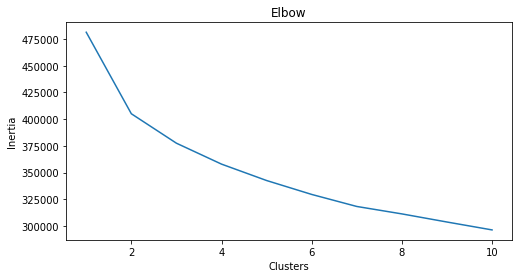

In [15]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)
#plot view
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [17]:
#Buat Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

#Model Train
model_kmeans3.fit(data)
model_kmeans4.fit(data)

#Tambah Label Data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,cluster_kmeans3,cluster_kmeans4
0,-0.198383,-0.692363,-0.418495,0.226281,0.703476,0.430948,0.354467,-0.040108,-0.203582,-0.289261,-0.369007,-0.434303,-0.527302,-0.470522,-0.302715,-0.333499,-0.366014,-0.474419,0.005560,0.385660,0.891955,1.017514,0.867824,0.205158,0.280976,0.591083,1.072156,1.533074,1.456925,1.211914,0.800647,0.233361,-0.151592,-0.913382,-0.449001,0.019126,0.284450,0.300640,0.128509,-0.286874,...,-1.468977,-0.410998,-0.301080,-0.460392,1.027199,-0.411601,0.379217,0.221238,0.648067,1.018877,0.859862,-0.228682,0.462908,1.244124,0.540386,0.802661,0.363272,0.214866,1.271357,0.881326,0.589214,-0.346551,0.695739,-0.145379,-1.055490,0.091294,0.504953,-0.353906,-0.226401,0.165960,-0.240592,0.338268,0.196208,0.878233,0.281847,1.218989,1.411592,-0.627953,1,2
1,-0.181608,-0.769861,-0.198402,0.054630,0.415849,0.728216,0.603630,-0.067410,-0.071163,-0.087074,0.056785,-0.286842,0.011724,-0.060407,-0.800042,-0.056442,-0.305557,-0.403368,0.314723,0.431769,0.530611,0.973614,0.643548,0.318718,0.031907,0.633169,0.934043,1.533074,1.617719,1.498221,0.844200,0.262208,0.716900,0.130203,1.105369,1.632847,1.600568,1.352909,1.059117,0.455124,...,-1.468977,-0.410998,-0.301080,-0.460392,-0.939236,-0.411601,0.642767,-0.141301,0.695706,1.805501,1.541688,0.699182,1.256730,1.007757,0.230306,1.121129,1.413266,0.554850,-0.356166,-0.217789,0.038850,0.696807,-1.090893,-0.158825,-0.220327,1.355516,1.384457,-0.615375,-0.557587,-1.106045,0.031254,-0.179152,0.521252,-0.666577,-0.075880,0.630895,1.020688,0.462971,1,2
2,0.554316,0.190766,0.541063,0.403223,-1.609044,-1.499101,-1.599917,-1.370083,-1.685320,-1.494356,-1.280809,-1.292435,-1.127178,-1.671992,-1.695614,-1.396280,-1.273692,-1.452193,-1.012990,-0.834386,0.118517,0.552723,1.061698,0.970848,0.941625,0.905928,1.233546,1.422772,0.802376,0.207892,-0.128659,-0.780317,0.279805,-0.194558,0.341299,-0.122573,-1.880546,-1.988850,-1.729491,-1.536266,...,0.680746,-0.002618,-0.301080,0.636114,-0.650188,-0.411601,-0.549284,-0.556870,-1.157001,-0.713587,-0.610164,-0.346887,-1.286550,-0.656313,-0.659306,-0.672728,-0.815413,-1.077558,-0.260283,-0.018067,-1.457683,-1.650052,0.772019,1.751177,-0.126254,-1.711404,-1.646748,-1.399154,-0.969231,-1.450869,-1.002483,-1.269184,-0.703575,-0.930477,-0.335289,0.131071,0.165440,-0.597665,1,2
3,0.015319,-0.451194,-0.161138,-0.380965,-1.817094,-1.664941,-1.545356,-1.430146,-1.644637,-1.754311,-1.311985,-1.476048,-1.580000,-1.490425,-1.651365,-1.573702,-1.241808,-1.841733,-1.380691,-1.041415,-0.466130,0.043482,0.771460,1.028753,0.886897,0.922976,1.153885,0.765245,0.972375,0.886135,0.401323,0.083935,0.100734,-0.534947,0.507431,-0.052989,-1.224878,-1.593739,-1.575760,-1.435878,...,0.680746,-0.410998,-0.301080,-0.460392,-0.650188,-0.411601,-0.044365,-1.285008,0.425556,0.084597,-0.198681,-0.335904,0.157802,0.271833,0.233294,-0.398042,0.024582,-0.540518,1.002386,1.455529,-0.186940,-1.169412,0.110692,-0.135294,-1.530161,-1.710738,-0.255120,-0.519440,-1.064034,-1.262332,-0.967523,-1.119132,-0.415381,0.041697,-0.424165,-0.603204,-0.023073,0.297763,1,2
4,0.159733,-0.149878,0.851988,0.695384,-1.177603,-1.122756,-1.082677,-0.983181,-0.957812,-0.910262,-0.905838,-1.085037,-1.002436,-0.510163,-0.653345,-0.461103,-0.404524,-0.511597,0.143881,0.940353,0.987366,0.436936,0.422141,0.364255,0.792518,1.243681,1.229925,0.773277,0.399036,0.008866,-0.471423,-0.693777,-0.295663,-0.713633,0.539715,0.224716,-1.533343,-1.498112,-1.261863,-1.378046,...,-1.468977,-0.410998,-0.301080,-0.460392,2.530739,-0.411601,1.242754,1.365454,0.084528,0.439812,0.244454,0.223744,0.978320,-0.134964,0.595352,0.115945,-0.140375,0.054301,0.006820,-0.644761,0.325792,-0.725637,1.772057,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


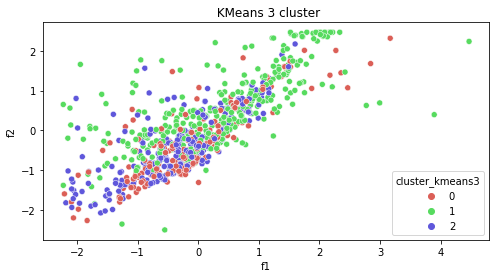

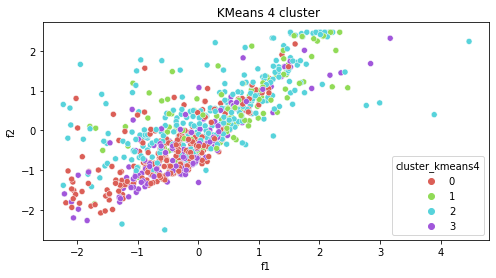

In [20]:
#Buat Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['f1'], data_cluster['f2'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['f1'], data_cluster['f2'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

##K-Medoids

In [21]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     |████████████████████████████████| 1.7 MB 2.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [22]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids
0,-0.198383,-0.692363,-0.418495,0.226281,0.703476,0.430948,0.354467,-0.040108,-0.203582,-0.289261,-0.369007,-0.434303,-0.527302,-0.470522,-0.302715,-0.333499,-0.366014,-0.474419,0.005560,0.385660,0.891955,1.017514,0.867824,0.205158,0.280976,0.591083,1.072156,1.533074,1.456925,1.211914,0.800647,0.233361,-0.151592,-0.913382,-0.449001,0.019126,0.284450,0.300640,0.128509,-0.286874,...,-0.410998,-0.301080,-0.460392,1.027199,-0.411601,0.379217,0.221238,0.648067,1.018877,0.859862,-0.228682,0.462908,1.244124,0.540386,0.802661,0.363272,0.214866,1.271357,0.881326,0.589214,-0.346551,0.695739,-0.145379,-1.055490,0.091294,0.504953,-0.353906,-0.226401,0.165960,-0.240592,0.338268,0.196208,0.878233,0.281847,1.218989,1.411592,-0.627953,1,2,1
1,-0.181608,-0.769861,-0.198402,0.054630,0.415849,0.728216,0.603630,-0.067410,-0.071163,-0.087074,0.056785,-0.286842,0.011724,-0.060407,-0.800042,-0.056442,-0.305557,-0.403368,0.314723,0.431769,0.530611,0.973614,0.643548,0.318718,0.031907,0.633169,0.934043,1.533074,1.617719,1.498221,0.844200,0.262208,0.716900,0.130203,1.105369,1.632847,1.600568,1.352909,1.059117,0.455124,...,-0.410998,-0.301080,-0.460392,-0.939236,-0.411601,0.642767,-0.141301,0.695706,1.805501,1.541688,0.699182,1.256730,1.007757,0.230306,1.121129,1.413266,0.554850,-0.356166,-0.217789,0.038850,0.696807,-1.090893,-0.158825,-0.220327,1.355516,1.384457,-0.615375,-0.557587,-1.106045,0.031254,-0.179152,0.521252,-0.666577,-0.075880,0.630895,1.020688,0.462971,1,2,3
2,0.554316,0.190766,0.541063,0.403223,-1.609044,-1.499101,-1.599917,-1.370083,-1.685320,-1.494356,-1.280809,-1.292435,-1.127178,-1.671992,-1.695614,-1.396280,-1.273692,-1.452193,-1.012990,-0.834386,0.118517,0.552723,1.061698,0.970848,0.941625,0.905928,1.233546,1.422772,0.802376,0.207892,-0.128659,-0.780317,0.279805,-0.194558,0.341299,-0.122573,-1.880546,-1.988850,-1.729491,-1.536266,...,-0.002618,-0.301080,0.636114,-0.650188,-0.411601,-0.549284,-0.556870,-1.157001,-0.713587,-0.610164,-0.346887,-1.286550,-0.656313,-0.659306,-0.672728,-0.815413,-1.077558,-0.260283,-0.018067,-1.457683,-1.650052,0.772019,1.751177,-0.126254,-1.711404,-1.646748,-1.399154,-0.969231,-1.450869,-1.002483,-1.269184,-0.703575,-0.930477,-0.335289,0.131071,0.165440,-0.597665,1,2,1
3,0.015319,-0.451194,-0.161138,-0.380965,-1.817094,-1.664941,-1.545356,-1.430146,-1.644637,-1.754311,-1.311985,-1.476048,-1.580000,-1.490425,-1.651365,-1.573702,-1.241808,-1.841733,-1.380691,-1.041415,-0.466130,0.043482,0.771460,1.028753,0.886897,0.922976,1.153885,0.765245,0.972375,0.886135,0.401323,0.083935,0.100734,-0.534947,0.507431,-0.052989,-1.224878,-1.593739,-1.575760,-1.435878,...,-0.410998,-0.301080,-0.460392,-0.650188,-0.411601,-0.044365,-1.285008,0.425556,0.084597,-0.198681,-0.335904,0.157802,0.271833,0.233294,-0.398042,0.024582,-0.540518,1.002386,1.455529,-0.186940,-1.169412,0.110692,-0.135294,-1.530161,-1.710738,-0.255120,-0.519440,-1.064034,-1.262332,-0.967523,-1.119132,-0.415381,0.041697,-0.424165,-0.603204,-0.023073,0.297763,1,2,1
4,0.159733,-0.149878,0.851988,0.695384,-1.177603,-1.122756,-1.082677,-0.983181,-0.957812,-0.910262,-0.905838,-1.085037,-1.002436,-0.510163,-0.653345,-0.461103,-0.404524,-0.511597,0.143881,0.940353,0.987366,0.436936,0.422141,0.364255,0.792518,1.243681,1.229925,0.773277,0.399036,0.008866,-0.471423,-0.693777,-0.295663,-0.713633,0.539715,0.224716,-1.533343,-1.498112,-1.261863,-1.378046,...,-0.410998,-0.301080,-0.460392,2.530739,-0.411601,1.242754,1.365454,0.084528,0.439812,0.244454,0.223744,0.978320,-0.134964,0.595352,0.115945,-0.140375,0.054301,0.006820,-0.644761,0.325792,-0.725637,1.772057,1.541419,-0.373284,-0.50982

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


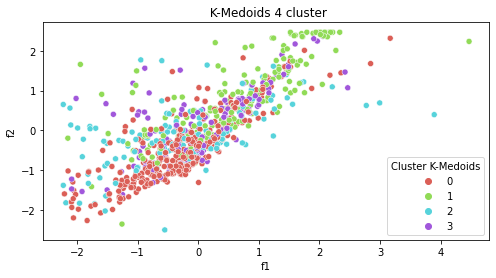

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['f1'], data_cluster['f2'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()

##Hierarchy

In [25]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
0,-0.198383,-0.692363,-0.418495,0.226281,0.703476,0.430948,0.354467,-0.040108,-0.203582,-0.289261,-0.369007,-0.434303,-0.527302,-0.470522,-0.302715,-0.333499,-0.366014,-0.474419,0.005560,0.385660,0.891955,1.017514,0.867824,0.205158,0.280976,0.591083,1.072156,1.533074,1.456925,1.211914,0.800647,0.233361,-0.151592,-0.913382,-0.449001,0.019126,0.284450,0.300640,0.128509,-0.286874,...,-0.461588,2.467977,-1.468977,-0.410998,-0.301080,-0.460392,1.027199,-0.411601,0.379217,0.221238,0.648067,1.018877,0.859862,-0.228682,0.462908,1.244124,0.540386,0.802661,0.363272,0.214866,1.271357,0.881326,0.589214,-0.346551,0.695739,-0.145379,-1.055490,0.091294,0.504953,-0.353906,-0.226401,0.165960,-0.240592,0.338268,0.196208,0.878233,0.281847,1.218989,1.411592,-0.627953
1,-0.181608,-0.769861,-0.198402,0.054630,0.415849,0.728216,0.603630,-0.067410,-0.071163,-0.087074,0.056785,-0.286842,0.011724,-0.060407,-0.800042,-0.056442,-0.305557,-0.403368,0.314723,0.431769,0.530611,0.973614,0.643548,0.318718,0.031907,0.633169,0.934043,1.533074,1.617719,1.498221,0.844200,0.262208,0.716900,0.130203,1.105369,1.632847,1.600568,1.352909,1.059117,0.455124,...,2.166433,-0.405190,-1.468977,-0.410998,-0.301080,-0.460392,-0.939236,-0.411601,0.642767,-0.141301,0.695706,1.805501,1.541688,0.699182,1.256730,1.007757,0.230306,1.121129,1.413266,0.554850,-0.356166,-0.217789,0.038850,0.696807,-1.090893,-0.158825,-0.220327,1.355516,1.384457,-0.615375,-0.557587,-1.106045,0.031254,-0.179152,0.521252,-0.666577,-0.075880,0.630895,1.020688,0.462971
2,0.554316,0.190766,0.541063,0.403223,-1.609044,-1.499101,-1.599917,-1.370083,-1.685320,-1.494356,-1.280809,-1.292435,-1.127178,-1.671992,-1.695614,-1.396280,-1.273692,-1.452193,-1.012990,-0.834386,0.118517,0.552723,1.061698,0.970848,0.941625,0.905928,1.233546,1.422772,0.802376,0.207892,-0.128659,-0.780317,0.279805,-0.194558,0.341299,-0.122573,-1.880546,-1.988850,-1.729491,-1.536266,...,-0.461588,-0.405190,0.680746,-0.002618,-0.301080,0.636114,-0.650188,-0.411601,-0.549284,-0.556870,-1.157001,-0.713587,-0.610164,-0.346887,-1.286550,-0.656313,-0.659306,-0.672728,-0.815413,-1.077558,-0.260283,-0.018067,-1.457683,-1.650052,0.772019,1.751177,-0.126254,-1.711404,-1.646748,-1.399154,-0.969231,-1.450869,-1.002483,-1.269184,-0.703575,-0.930477,-0.335289,0.131071,0.165440,-0.597665
3,0.015319,-0.451194,-0.161138,-0.380965,-1.817094,-1.664941,-1.545356,-1.430146,-1.644637,-1.754311,-1.311985,-1.476048,-1.580000,-1.490425,-1.651365,-1.573702,-1.241808,-1.841733,-1.380691,-1.041415,-0.466130,0.043482,0.771460,1.028753,0.886897,0.922976,1.153885,0.765245,0.972375,0.886135,0.401323,0.083935,0.100734,-0.534947,0.507431,-0.052989,-1.224878,-1.593739,-1.575760,-1.435878,...,-0.461588,-0.405190,0.680746,-0.410998,-0.301080,-0.460392,-0.650188,-0.411601,-0.044365,-1.285008,0.425556,0.084597,-0.198681,-0.335904,0.157802,0.271833,0.233294,-0.398042,0.024582,-0.540518,1.002386,1.455529,-0.186940,-1.169412,0.110692,-0.135294,-1.530161,-1.710738,-0.255120,-0.519440,-1.064034,-1.262332,-0.967523,-1.119132,-0.415381,0.041697,-0.424165,-0.603204,-0.023073,0.297763
4,0.159733,-0.149878,0.851988,0.695384,-1.177603,-1.122756,-1.082677,-0.983181,-0.957812,-0.910262,-0.905838,-1.085037,-1.002436,-0.510163,-0.653345,-0.461103,-0.404524,-0.511597,0.143881,0.940353,0.987366,0.436936,0.422141,0.364255,0.792518,1.243681,1.229925,0.773277,0.399036,0.008866,-0.471423,-0.693777,-0.295663,-0.713633,0.539715,0.224716,-1.533343,-1.498112,-1.261863,-1.378046,...,-0.461588,2.467977,-1.468977,-0.410998,-0.301080,-0.460392,2.530739,-0.411601,1.242754,1.365454,0.084528,0.439812,0.244454,0.223744,0.978320,-0.134964,0.595352,0.115945,-0.1403

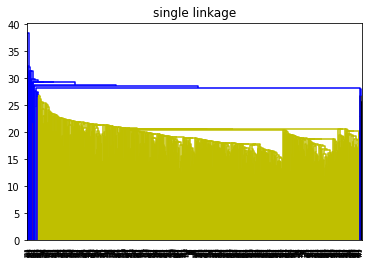

In [26]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("single linkage")
plt.show()

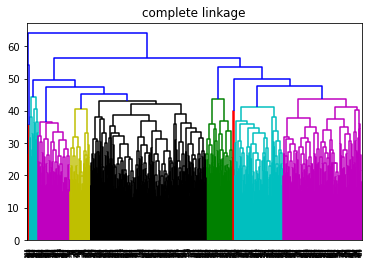

In [27]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("complete linkage")
plt.show()

In [28]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [29]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f602,f603,f604,f605,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids,cluster_hierarchy
0,-0.198383,-0.692363,-0.418495,0.226281,0.703476,0.430948,0.354467,-0.040108,-0.203582,-0.289261,-0.369007,-0.434303,-0.527302,-0.470522,-0.302715,-0.333499,-0.366014,-0.474419,0.005560,0.385660,0.891955,1.017514,0.867824,0.205158,0.280976,0.591083,1.072156,1.533074,1.456925,1.211914,0.800647,0.233361,-0.151592,-0.913382,-0.449001,0.019126,0.284450,0.300640,0.128509,-0.286874,...,-0.301080,-0.460392,1.027199,-0.411601,0.379217,0.221238,0.648067,1.018877,0.859862,-0.228682,0.462908,1.244124,0.540386,0.802661,0.363272,0.214866,1.271357,0.881326,0.589214,-0.346551,0.695739,-0.145379,-1.055490,0.091294,0.504953,-0.353906,-0.226401,0.165960,-0.240592,0.338268,0.196208,0.878233,0.281847,1.218989,1.411592,-0.627953,1,2,1,0
1,-0.181608,-0.769861,-0.198402,0.054630,0.415849,0.728216,0.603630,-0.067410,-0.071163,-0.087074,0.056785,-0.286842,0.011724,-0.060407,-0.800042,-0.056442,-0.305557,-0.403368,0.314723,0.431769,0.530611,0.973614,0.643548,0.318718,0.031907,0.633169,0.934043,1.533074,1.617719,1.498221,0.844200,0.262208,0.716900,0.130203,1.105369,1.632847,1.600568,1.352909,1.059117,0.455124,...,-0.301080,-0.460392,-0.939236,-0.411601,0.642767,-0.141301,0.695706,1.805501,1.541688,0.699182,1.256730,1.007757,0.230306,1.121129,1.413266,0.554850,-0.356166,-0.217789,0.038850,0.696807,-1.090893,-0.158825,-0.220327,1.355516,1.384457,-0.615375,-0.557587,-1.106045,0.031254,-0.179152,0.521252,-0.666577,-0.075880,0.630895,1.020688,0.462971,1,2,3,0
2,0.554316,0.190766,0.541063,0.403223,-1.609044,-1.499101,-1.599917,-1.370083,-1.685320,-1.494356,-1.280809,-1.292435,-1.127178,-1.671992,-1.695614,-1.396280,-1.273692,-1.452193,-1.012990,-0.834386,0.118517,0.552723,1.061698,0.970848,0.941625,0.905928,1.233546,1.422772,0.802376,0.207892,-0.128659,-0.780317,0.279805,-0.194558,0.341299,-0.122573,-1.880546,-1.988850,-1.729491,-1.536266,...,-0.301080,0.636114,-0.650188,-0.411601,-0.549284,-0.556870,-1.157001,-0.713587,-0.610164,-0.346887,-1.286550,-0.656313,-0.659306,-0.672728,-0.815413,-1.077558,-0.260283,-0.018067,-1.457683,-1.650052,0.772019,1.751177,-0.126254,-1.711404,-1.646748,-1.399154,-0.969231,-1.450869,-1.002483,-1.269184,-0.703575,-0.930477,-0.335289,0.131071,0.165440,-0.597665,1,2,1,0
3,0.015319,-0.451194,-0.161138,-0.380965,-1.817094,-1.664941,-1.545356,-1.430146,-1.644637,-1.754311,-1.311985,-1.476048,-1.580000,-1.490425,-1.651365,-1.573702,-1.241808,-1.841733,-1.380691,-1.041415,-0.466130,0.043482,0.771460,1.028753,0.886897,0.922976,1.153885,0.765245,0.972375,0.886135,0.401323,0.083935,0.100734,-0.534947,0.507431,-0.052989,-1.224878,-1.593739,-1.575760,-1.435878,...,-0.301080,-0.460392,-0.650188,-0.411601,-0.044365,-1.285008,0.425556,0.084597,-0.198681,-0.335904,0.157802,0.271833,0.233294,-0.398042,0.024582,-0.540518,1.002386,1.455529,-0.186940,-1.169412,0.110692,-0.135294,-1.530161,-1.710738,-0.255120,-0.519440,-1.064034,-1.262332,-0.967523,-1.119132,-0.415381,0.041697,-0.424165,-0.603204,-0.023073,0.297763,1,2,1,0
4,0.159733,-0.149878,0.851988,0.695384,-1.177603,-1.122756,-1.082677,-0.983181,-0.957812,-0.910262,-0.905838,-1.085037,-1.002436,-0.510163,-0.653345,-0.461103,-0.404524,-0.511597,0.143881,0.940353,0.987366,0.436936,0.422141,0.364255,0.792518,1.243681,1.229925,0.773277,0.399036,0.008866,-0.471423,-0.693777,-0.295663,-0.713633,0.539715,0.224716,-1.533343,-1.498112,-1.261863,-1.378046,...,-0.301080,-0.460392,2.530739,-0.411601,1.242754,1.365454,0.084528,0.439812,0.244454,0.223744,0.978320,-0.134964,0.595352,0.115945,-0.140375,0.054301,0.006820,-0.644761,0.325792,-0.725637,1.772057,1.541419,-0.373284,-0.509827,-1.593524,-0.027226,-0.3891

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'hierarchical clustering')

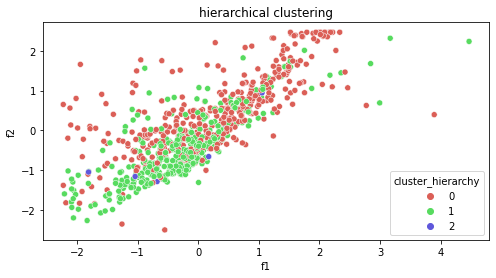

In [30]:
# tampilkan plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data_cluster['f1'], data_cluster['f2'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls', 3))
plt.title('hierarchical clustering')

##DBScan

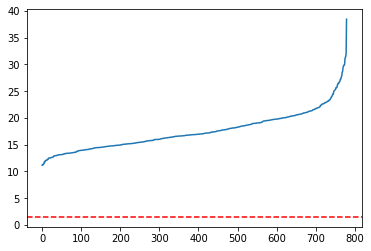

In [31]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')

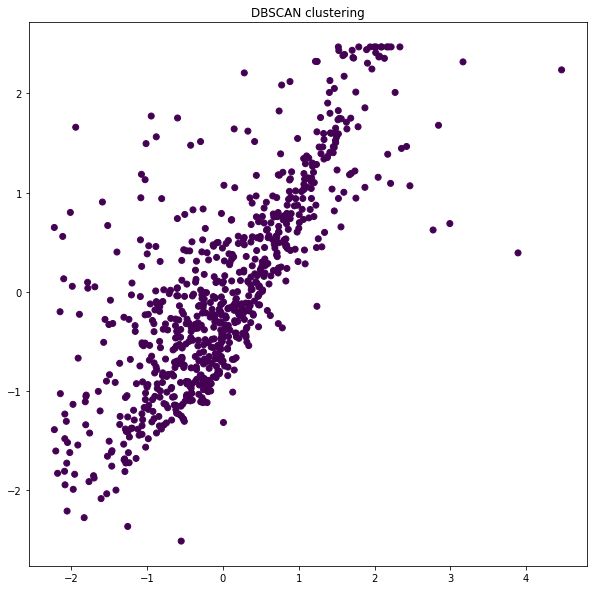

In [32]:
model_dbscan = DBSCAN(eps=1.5, min_samples=13)
model_dbscan.fit(data)

plt.figure(figsize=(10,10))
plt.scatter(data_cluster['f1'], data_cluster['f2'], c=model_dbscan.labels_)
plt.title('DBSCAN clustering')
plt.show()